In [7]:
import numpy as np
import networkx as nx
import tsplib95
import matplotlib.pyplot as plt
import math

In [8]:
problem = tsplib95.load("a280.tsp")
G  = problem.get_graph()
layout = nx.spring_layout(G,seed=0)
arr=np.array(G.nodes)
np.random.shuffle(arr)

In [9]:
def get_edge_list(array):
    res=[]

    for i in range(len(array)-1):
        res.append((array[i],array[i+1]))

    res.append((array[-1],array[0]))

    return res

def get_distance(node1, node2):
    return math.dist(node1['coord'],node2['coord'])

def get_fitness(edge_list):
    fitness=0
    for pair in edge_list:
        fitness += get_distance(G.nodes[pair[0]],G.nodes[pair[1]])
    return fitness

# get_distance(G.nodes[2],G.nodes[2])
edge_list = get_edge_list(arr)
get_fitness(edge_list)


33463.541570885114

In [10]:
print(type(arr))
print(get_edge_list([i[0] for i in edge_list]))

<class 'numpy.ndarray'>
[(48, 176), (176, 68), (68, 239), (239, 75), (75, 189), (189, 84), (84, 83), (83, 191), (191, 193), (193, 218), (218, 268), (268, 113), (113, 219), (219, 3), (3, 29), (29, 194), (194, 60), (60, 23), (23, 217), (217, 148), (148, 201), (201, 133), (133, 36), (36, 257), (257, 222), (222, 20), (20, 154), (154, 278), (278, 238), (238, 280), (280, 241), (241, 33), (33, 77), (77, 17), (17, 151), (151, 196), (196, 40), (40, 246), (246, 204), (204, 203), (203, 129), (129, 1), (1, 44), (44, 118), (118, 91), (91, 63), (63, 100), (100, 57), (57, 81), (81, 156), (156, 55), (55, 150), (150, 272), (272, 170), (170, 111), (111, 85), (85, 198), (198, 90), (90, 155), (155, 169), (169, 172), (172, 279), (279, 190), (190, 273), (273, 235), (235, 178), (178, 131), (131, 21), (21, 32), (32, 174), (174, 237), (237, 67), (67, 248), (248, 209), (209, 161), (161, 130), (130, 52), (52, 53), (53, 124), (124, 228), (228, 146), (146, 61), (61, 210), (210, 24), (24, 253), (253, 19), (19, 231)

In [11]:
dictionary = dict()
G.nodes[1]['coord']
for i in range(1,len(G.nodes)+1):
    dictionary[i] = G.nodes[i]['coord']
# print (dictionary)

2586.7696475631606


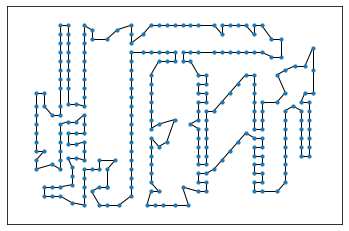

In [12]:
solution = tsplib95.load("a280.opt.tour").tours[0]
solution = get_edge_list(solution)
# nx.draw_networkx(G, with_labels=False, node_size=10, edgelist=[])
nx.draw_networkx(G, pos=dictionary, with_labels=False, node_size=10, edgelist=solution)
print(get_fitness(solution))

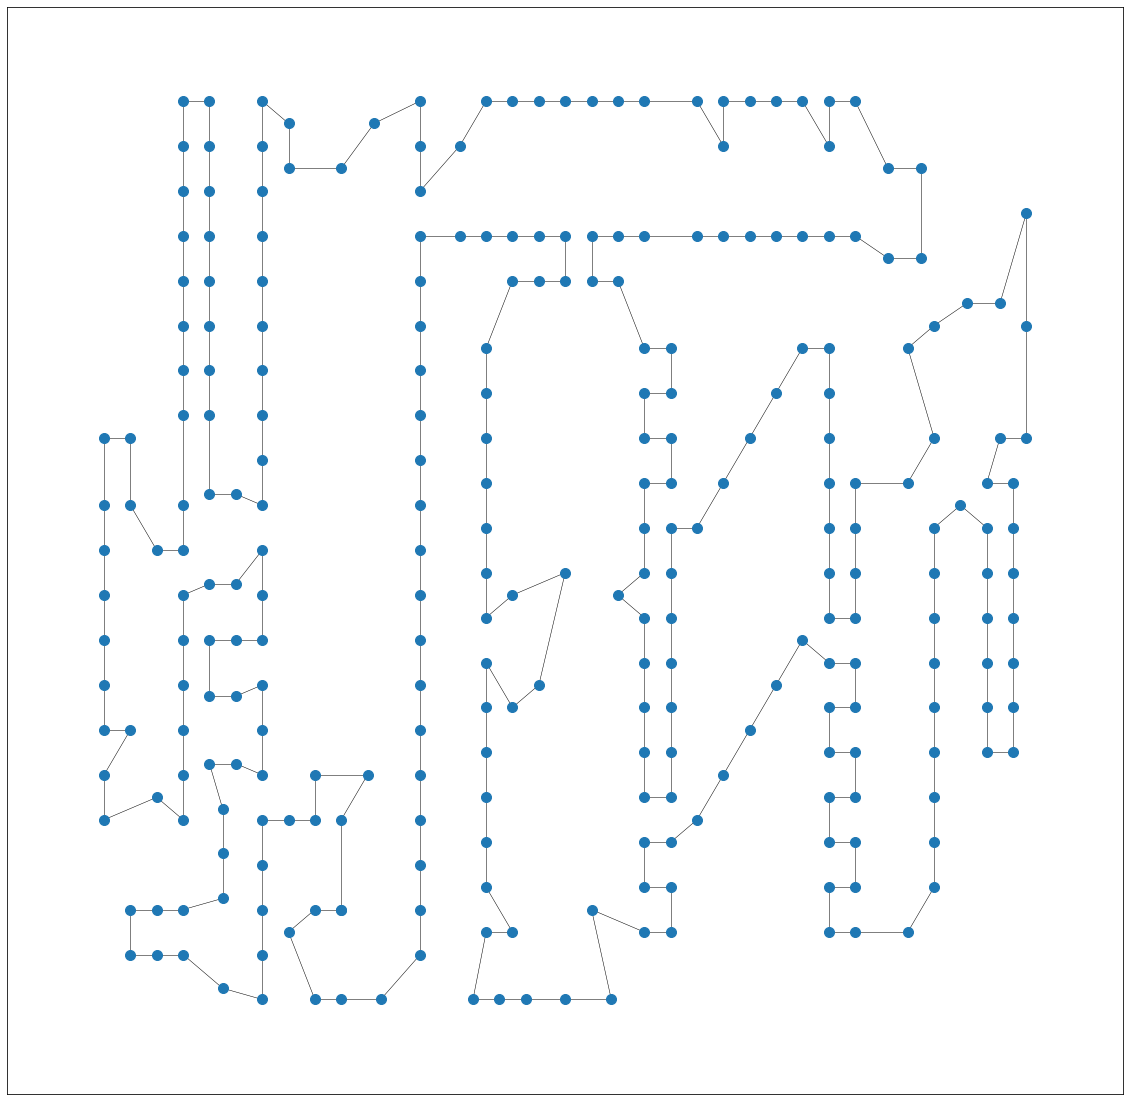

In [13]:
fig, axs = plt.subplots(1, figsize=(20,20))
# nx.draw_networkx(G, pos=dictionary, with_labels=True, edgelist=solution, ax=axs)
nx.draw_networkx_edges(G, pos=dictionary, width=0.5,edgelist=solution, ax=axs)
nx.draw_networkx_nodes(G, pos=dictionary, node_size=100,ax=axs)
